IIC 2433 - Minería de datos

# Entrega 2 Proyecto Final - Primeros Análisis

## 1. Definición del Problema

Es conocido que el sistema bancario en Chile se caracteriza por su alta competencia derivada del gran número de ofertas financieras existentes en el mercado.  Esta competencia obliga a las instituciones bancarias a invertir grandes esfuerzos en generar estrategias efectivas de atracción y retención de clientes. Una tarea clave para esta labor es poder segmentar e identificar a los clientes, de manera que se puedan generar campañas de captación y fidelización adaptadas a cada tipo de cliente, maximizando su efectividad y fortaleciendo la relación del cliente con el banco.

La segmentación debe permitir identificar grupos homogéneos de usuarios que compartan características similares, tales como patrones de uso, perfiles de rentabilidad o lealtad a la institución. Actualmente, al no contar con una segmentación clara y precisa, el banco enfrenta desafíos  y dificultades para poder diseñar estrategías personalizadas para cada tipo de cliente, viendo limitada su capacidad de personalizar la oferta de productos y servicios y responder de manera eficiente a las exigencias existentes en el mercado.

Por lo tanto, este trabajo aborda la problemática de entender y clasificar a los clientes en perfiles representativos, tales como "clientes ocasionales," "clientes rentables," o "clientes leales" utilizando herramientas propias de la minería de datos junto con técnicas derivadas del maching learning. Estas técnicas permiten extraer patrones significativos a partir del análisis de grandes volúmenes de información como lo es el número de clientes del banco junto con todas sus características. Cada segmento debe ser fácilmente identificable y diferenciable, facilitando la toma de decisiones estratégicas en cuanto a la asignación de recursos para marketing y la implementación de campañas promocionales que respondan a las particularidades de cada grupo.

# 2. Impacto del Trabajo

El impacto de este trabajo radica en su capacidad para mejorar la eficiencia y efectividad de las estrategias de marketing y fidelización de clientes del banco en un entorno de alta competencia. Como señalan Chan e Ip (2011), “maximizar el valor del cliente es la clave para sobrevivir a la feroz competencia en el mundo de los negocios.” La segmentación de clientes permite al banco diferenciar a los usuarios más rentables de los menos rentables, facilitando la implementación de estrategias personalizadas que favorezcan y prioricen relaciones a largo plazo. Al identificar y agrupar a los clientes según sus características y comportamientos, el banco puede optimizar la asignación de recursos, diseñando campañas adaptadas a las necesidades específicas de cada segmento, lo que incrementa su efectividad y refuerza la relación con cada grupo de clientes.

Este trabajo es crucial, ya que la personalización se ha convertido en un factor decisivo para la atracción y retención de clientes en sectores tan competitivos como el bancario. La aplicación de minería de datos y técnicas de machine learning en la segmentación de clientes ofrece al banco una ventaja significativa al anticiparse a las necesidades de sus usuarios, brindándoles productos y servicios acordes a sus perfiles. Así, el banco no solo mejora su posicionamiento en el mercado, sino que incrementa la satisfacción del cliente y asegura un crecimiento sostenible, lo cual es fundamental para su éxito a largo plazo.

# 3. Datos

## 3.1 Importación de librerias

In [25]:
# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Operational Libraries
import pandas as pd
import numpy as np

# Graficas
import seaborn as sns
import matplotlib.pyplot as plt

# warnings
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

## 3.2 Carga de datos desde Excel a DataFrame de Pandas


In [2]:
file_id = '10xZY27WYUZ-wH1Aewqyt4eFf6oh75LJA'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)


In [3]:
df

,Unnamed: 0,rut,Genero,Categoria_Digital,Elasticidad_Precios,Nacionalidad,Propension,Probabilidad_No_Pago,Edad,Renta,Oferta_Consumo,Deuda_CMF,Tiempo_como_cliente
0,0,1,Masculino,Cliente no Digital,Alta,Chileno,0.997340,0.028445,30.0,6.258183e+05,2164276.0,7.125854e+05,2
1,1,2,Femenino,Cliente no Digital,Baja,Chileno,0.291601,0.014320,41.0,3.172616e+05,1451704.0,1.970697e+05,2
2,2,3,Femenino,Cliente no Digital,Baja,Chileno,0.685085,0.002156,38.0,1.240551e+07,39322607.0,1.400604e+07,2
3,3,4,Masculino,Cliente no Digital,Alta,Chileno,0.914672,0.034418,57.0,5.441466e+05,1607042.0,5.159465e+05,2
4,4,5,Masculino,Cliente Digital,Media,Chileno,0.425077,0.014978,26.0,1.870225e+05,493865.0,2.601013e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543646,543646,543647,Femenino,Cliente Digital,Baja,Chileno,0.144657,0.037291,29.0,1.176598e+05,9625991.0,1.299826e+05,2
543647,543647,543648,Masculino,Cliente no Digital,Baja,Chileno,0.740170,0.035877,31.0,1.558612e+06,7522126.0,1.740917e+06,2
543648,543648,543649,Masculino,Cliente no Digital,Media,Chileno,0.255285,0.023306,49.0,9.449508e+05,1889172.0,1.057952e+06,2
543649,543649,543650,Femenino,Cliente no Digital,Media,Chileno,0.709086,0.015121,40.0,1.039964e+06,4518498.0,1.010872e+06,2


## 3.3 Carga de 'Informacion_Clientes.csv'

En primer lugar se cargará la información de los clientes. Esto incluye las siguientes características de los clientes:

* **unnamed**: algo como uid
* **Rut**: identificador de Chile (por privacidad va desde 0 a max de observaciones)
* **Género**: Masculino o femenino
* **Categoría_Digital**: Si el cliente es digital o no
* **Elasticidad_Precios**: Baja, media o alta
* **Nacionalidad**: Chileno o extranjero
* **Propensión**: Número entre 0 y 1 que idica que tan propenso a cursar un credito es el cliente
* **Probabilidad_No_Pago**: Número entre 0 y 1 que indica la probabilidad de que el cliente no pague la deuda
* **Edad**: Numero entero de edad en años
* **Renta**: Renta promedio de los últimos 12 meses
* **Oferta_Consumo**: Monto máximo que puede cursar un cliente dado sus antecedentes crediticios y situación socioeconómica. 
* **Deuda_CMF**: Deuda que tiene el cliente en otros bancos. Efectivamente es deuda pendiente, pero de créditos otorgados por la competencia.
* **Tiempo_como_cliente**: Tiempo en años que el cliente lleva en el banco


# 4. Análisis Exploratorio de los Datos

## 4.1 Análisis univariado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543651 entries, 0 to 543650
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            543651 non-null  int64  
 1   rut                   543651 non-null  int64  
 2   Genero                543651 non-null  object 
 3   Categoria_Digital     543651 non-null  object 
 4   Elasticidad_Precios   543651 non-null  object 
 5   Nacionalidad          543651 non-null  object 
 6   Propension            543651 non-null  float64
 7   Probabilidad_No_Pago  543651 non-null  float64
 8   Edad                  543651 non-null  float64
 9   Renta                 543651 non-null  float64
 10  Oferta_Consumo        543651 non-null  float64
 11  Deuda_CMF             543651 non-null  float64
 12  Tiempo_como_cliente   543651 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 53.9+ MB


In [7]:
df.drop(columns={'Unnamed: 0','rut'}, axis=1, inplace = True)

## 4.2 Variables numéricas

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Propension,543651.0,5.004256e-01,2.888922e-01,2.043677e-06,2.502518e-01,5.000772e-01,7.510515e-01,9.999983e-01
Probabilidad_No_Pago,543651.0,1.752431e-02,1.520662e-02,4.695378e-08,5.871952e-03,1.262941e-02,2.649477e-02,6.999903e-02
Edad,543651.0,4.015142e+01,9.539764e+00,2.500000e+01,3.100000e+01,3.900000e+01,4.700000e+01,6.700000e+01
Renta,543651.0,2.374246e+06,4.163065e+06,1.621666e+00,4.612606e+05,1.181153e+06,2.666200e+06,1.418892e+08
Oferta_Consumo,543651.0,7.767093e+06,2.065785e+07,4.000000e+00,1.265267e+06,3.346343e+06,7.681837e+06,7.996085e+08
Deuda_CMF,543651.0,2.374605e+06,4.274149e+06,-2.897343e+03,4.460804e+05,1.151554e+06,2.643366e+06,1.772248e+08
Tiempo_como_cliente,543651.0,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [35]:
# La variable Tiempo_como_cliente tiene un único valor, por ello la retiraremos del análisis
df.drop(columns={'Tiempo_como_cliente'}, axis=1, inplace = True)

In [44]:
var_nun = df.describe().columns

#-------------------------#
Variable Propension
#-------------------------#


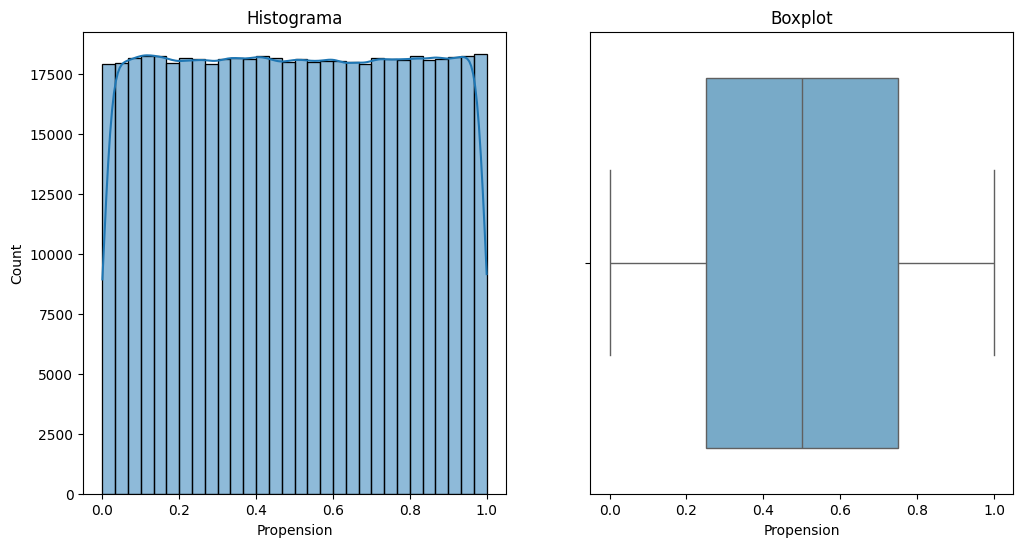

#-------------------------#
Variable Probabilidad_No_Pago
#-------------------------#


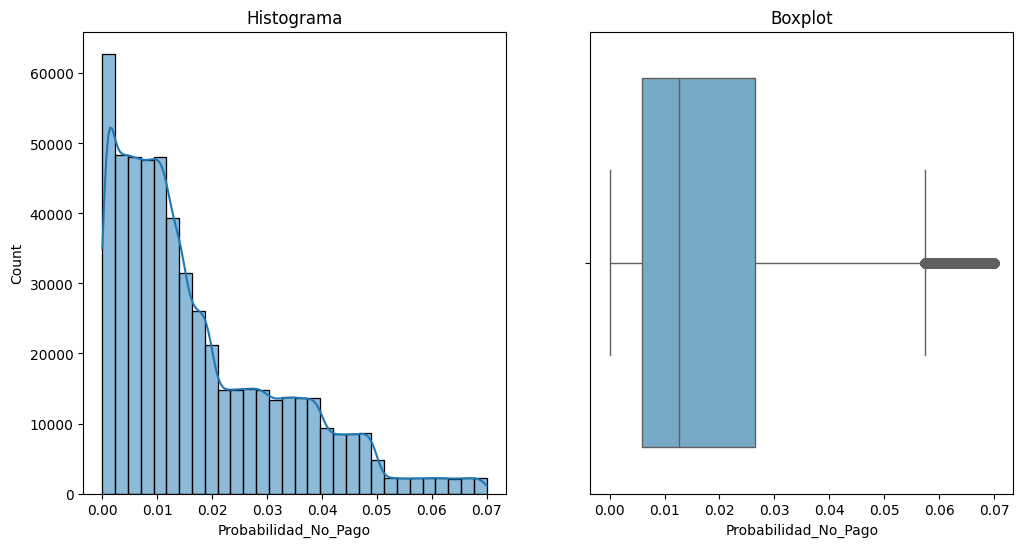

#-------------------------#
Variable Edad
#-------------------------#


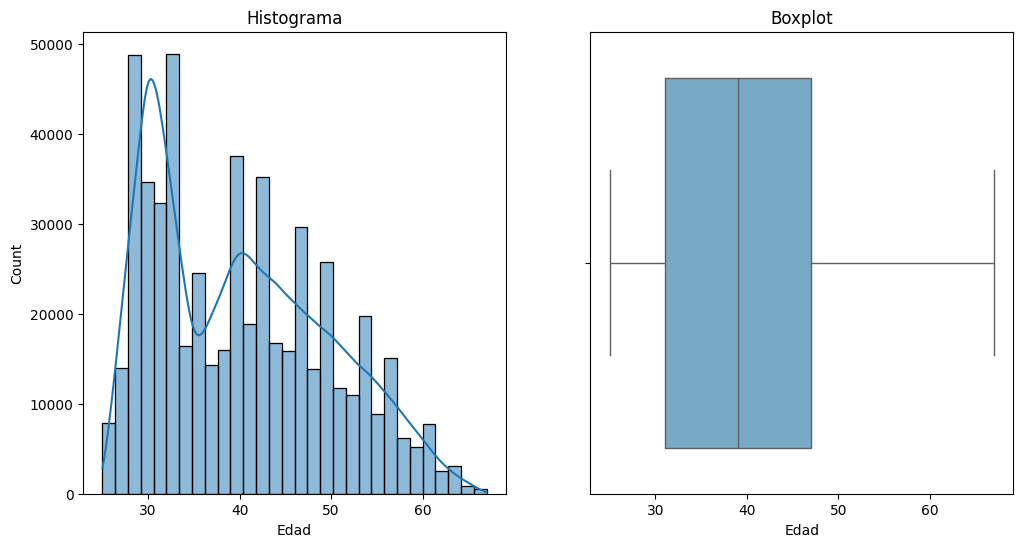

#-------------------------#
Variable Renta
#-------------------------#


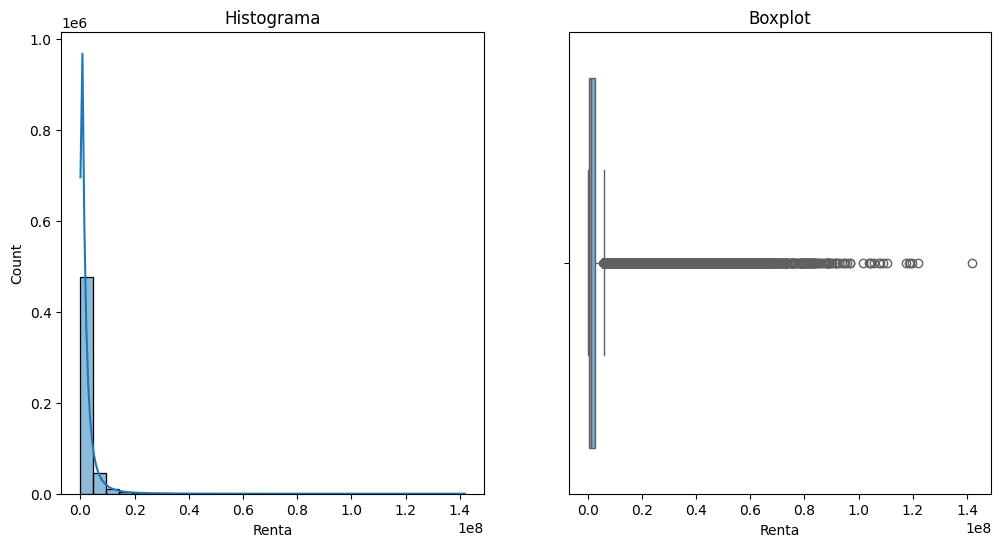

#-------------------------#
Variable Oferta_Consumo
#-------------------------#


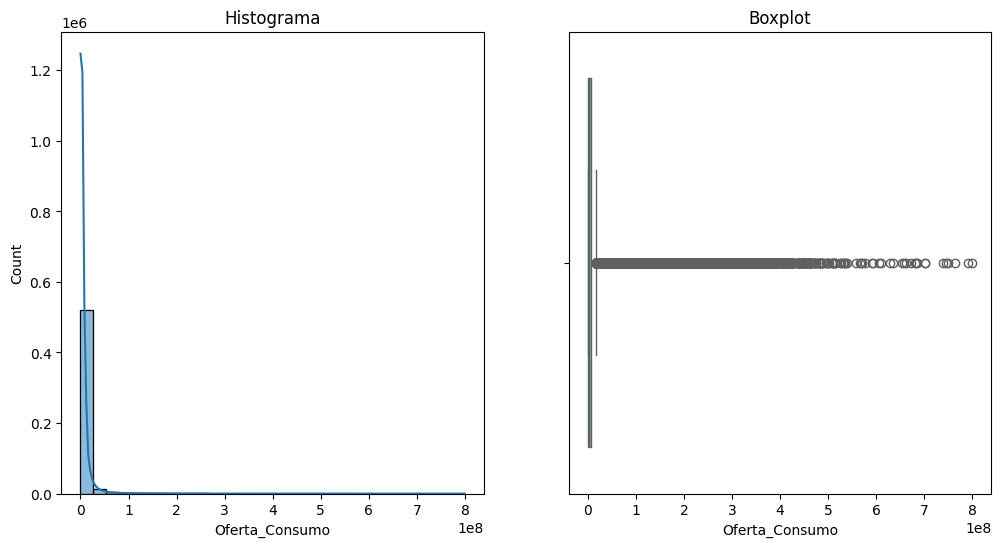

#-------------------------#
Variable Deuda_CMF
#-------------------------#


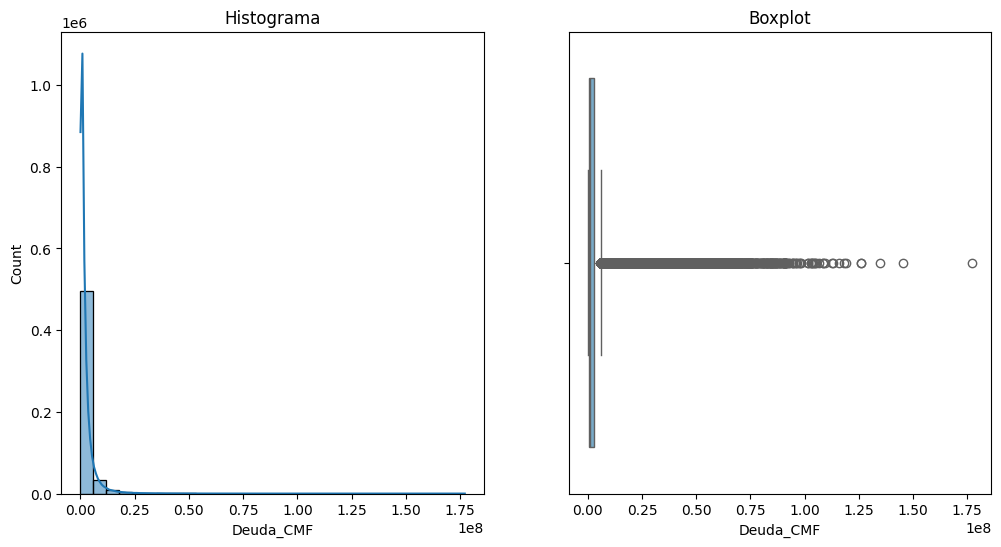

In [53]:
for j in list(var_nun):
    print('#-------------------------#')
    print('Variable',j)
    print('#-------------------------#')

    plt.figure(figsize=(12, 6))

    # Crear el subplot para el histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
    sns.histplot(data=df, x=j, palette='Blues', kde=True, bins=30)
    plt.title('Histograma')

    # Crear el subplot para el boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
    sns.boxplot(data=df, x=j, palette='Blues')
    plt.title('Boxplot')
    plt.show()

## 4.3 Variables categóricas

In [28]:
var_cat = df.describe(include=['object']).columns

#-------------------------#
Variable Genero
#-------------------------#
           Conteo  Porcentaje (%)
Genero                           
Masculino  303150       55.761877
Femenino   240501       44.238123


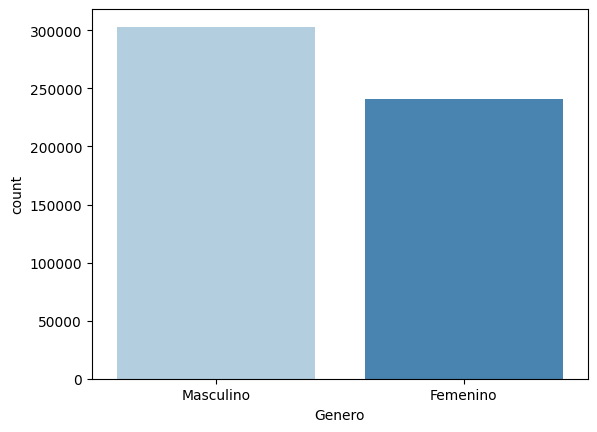

#-------------------------#
Variable Categoria_Digital
#-------------------------#
                    Conteo  Porcentaje (%)
Categoria_Digital                         
Cliente no Digital  272382       50.102363
Cliente Digital     271269       49.897637


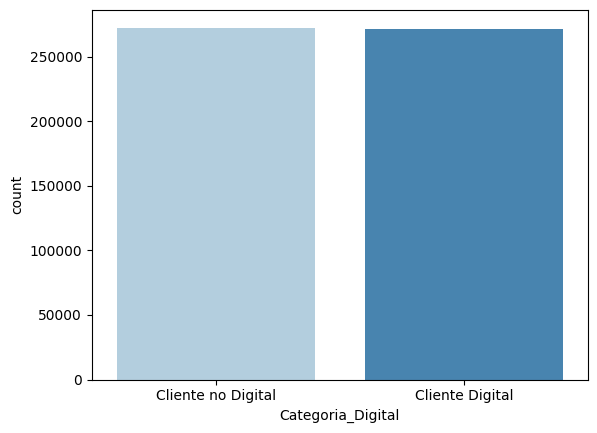

#-------------------------#
Variable Elasticidad_Precios
#-------------------------#
                     Conteo  Porcentaje (%)
Elasticidad_Precios                        
Baja                 232299       42.729435
Media                186659       34.334343
Alta                 124693       22.936222


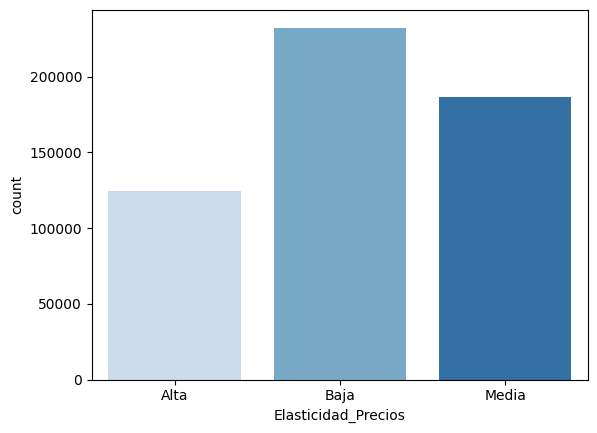

#-------------------------#
Variable Nacionalidad
#-------------------------#
              Conteo  Porcentaje (%)
Nacionalidad                        
Chileno       527455       97.020883
Extranjero     16196        2.979117


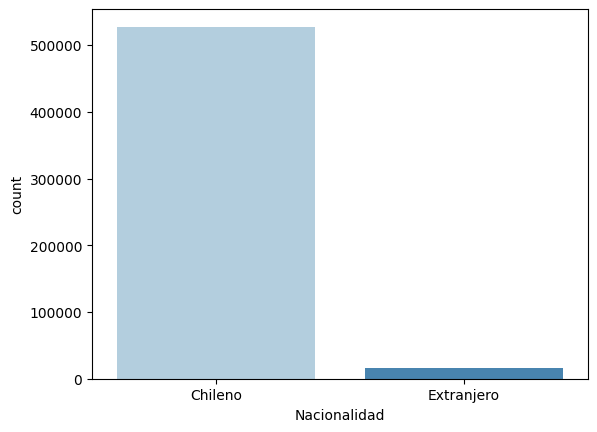

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in list(var_cat):
    print('#-------------------------#')
    print('Variable',i)
    print('#-------------------------#')
    
    Porcentajes = df[i].value_counts(normalize=True) * 100  
    Conteos = df[i].value_counts()  
    table = pd.DataFrame({
    'Conteo': Conteos,
    'Porcentaje (%)': Porcentajes
    })
    
    print(table)
    sns.countplot(df,x = f'{i}',palette = 'Blues')
    plt.show()
    

## 4.4 Análisis bivariado

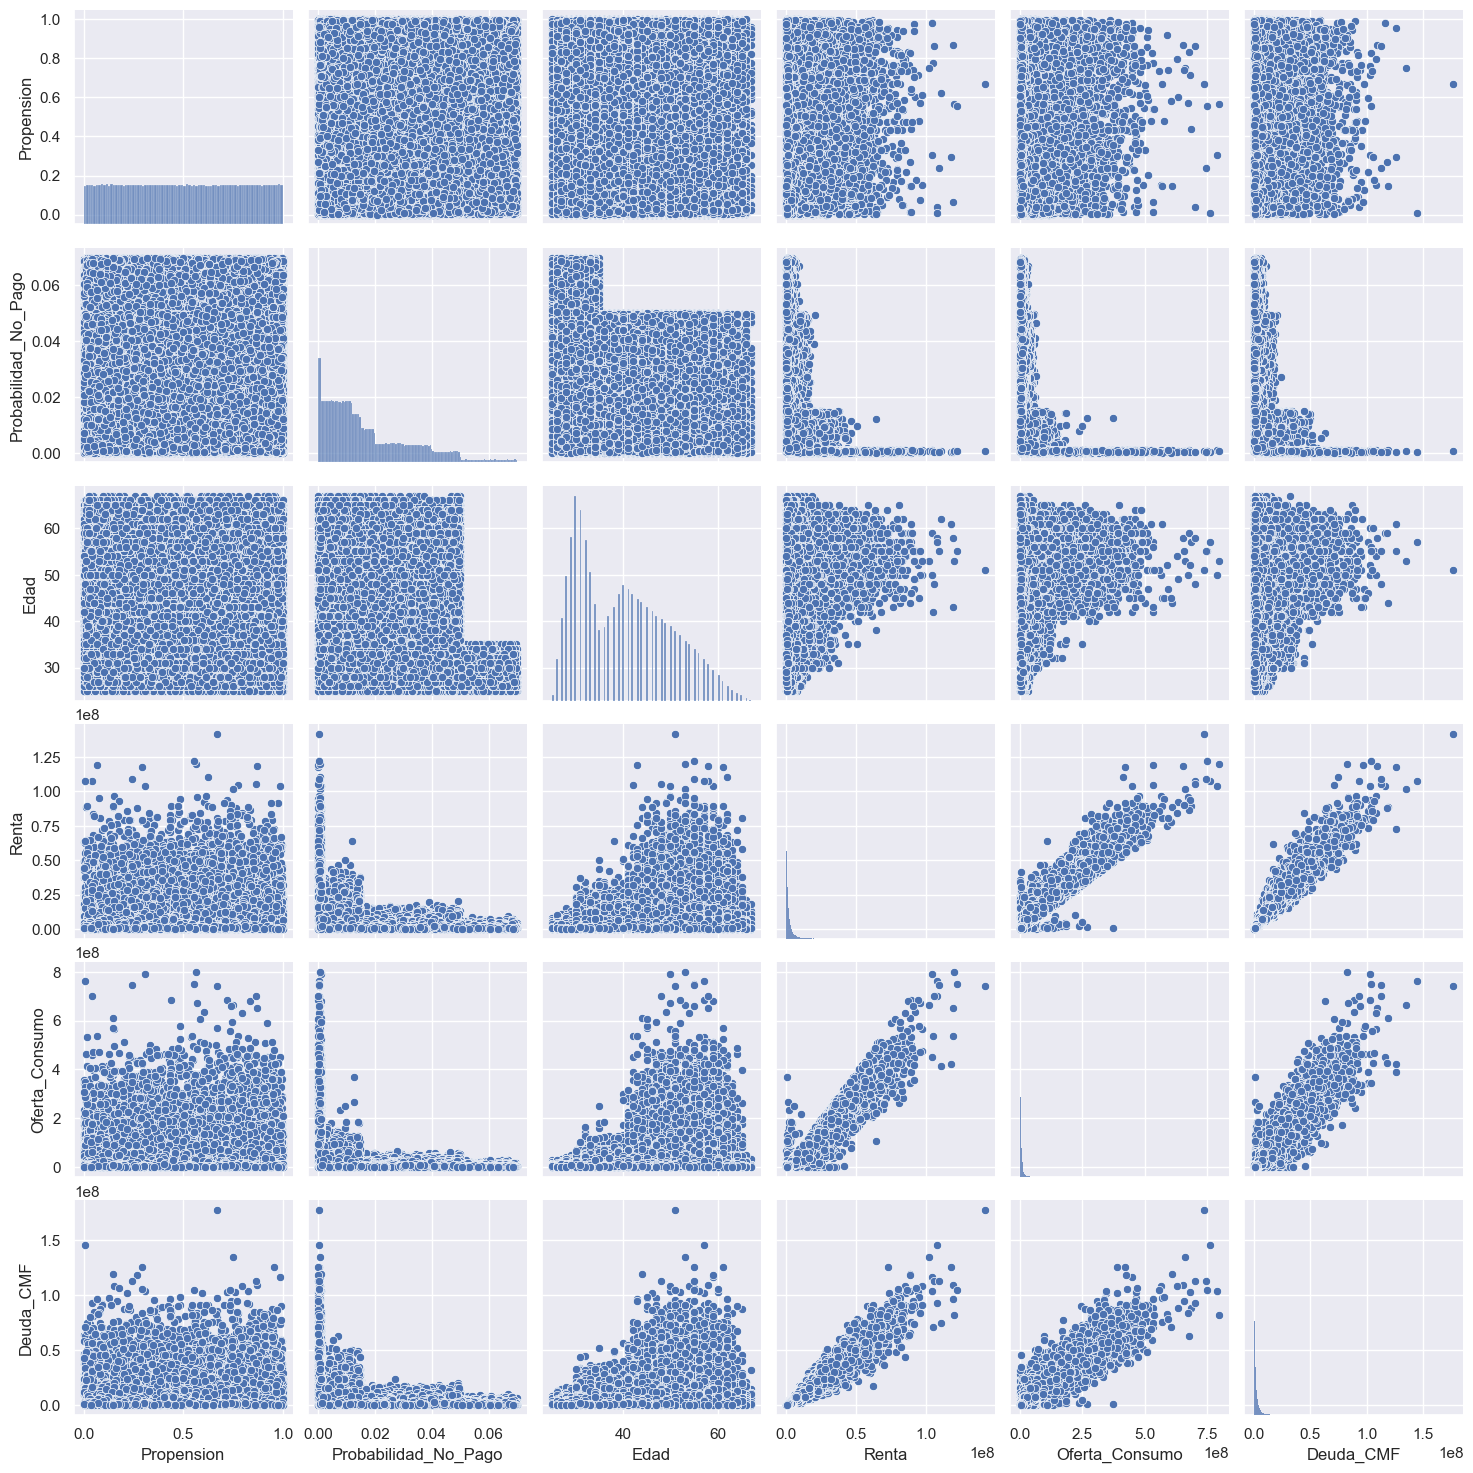

In [55]:
# Scatter plot:
sns.set()
cols = var_nun
sns.pairplot(df[cols], height = 2.5)
plt.show()

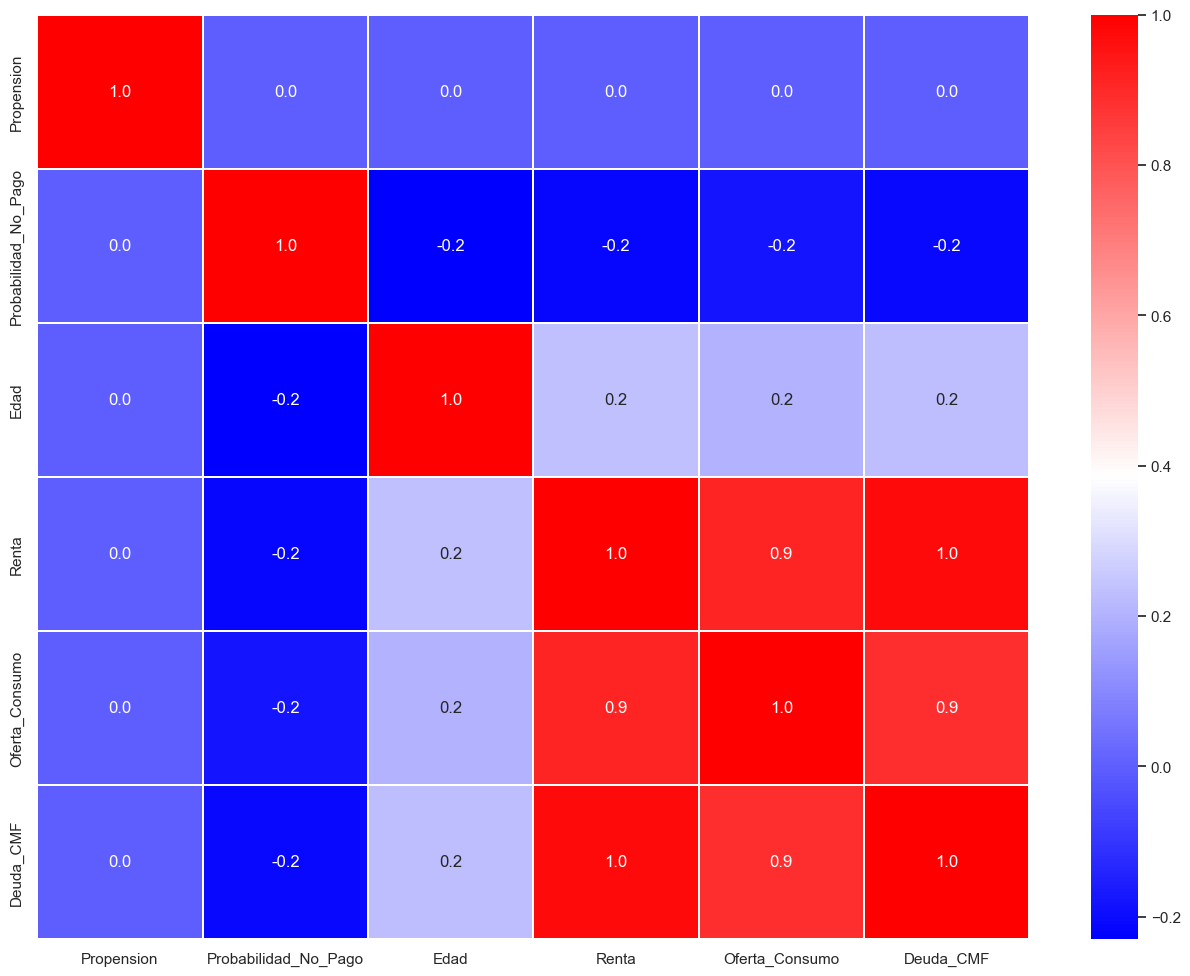

In [61]:
corrmat = df[var_nun].corr()
fig = plt.figure(figsize=(16,12))
sns.heatmap(corrmat,annot=corrmat,fmt='.1f',linewidth=0.2,cmap='bwr')
plt.show()

#--------------------------------#
Propension - Genero
#--------------------------------#


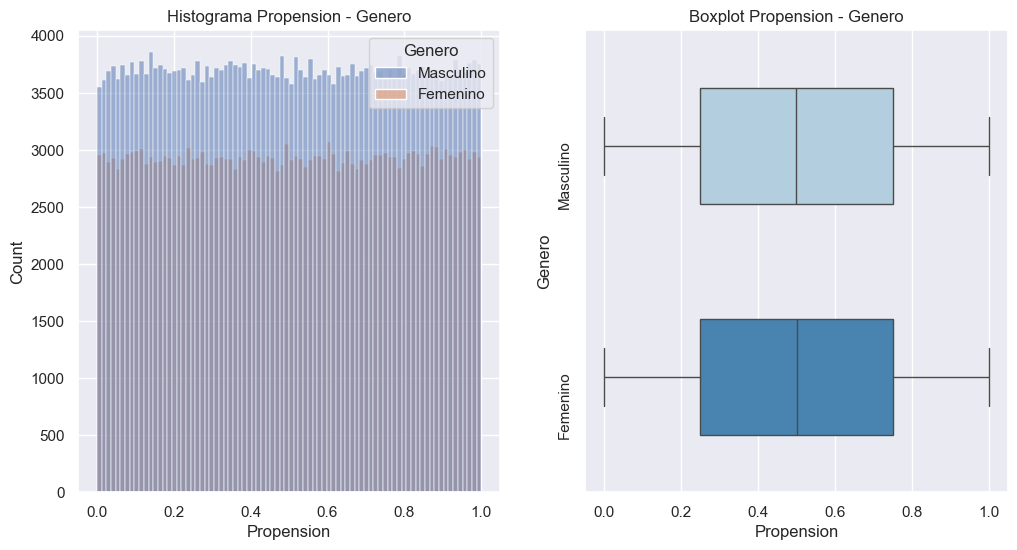

#--------------------------------#
Propension - Categoria_Digital
#--------------------------------#


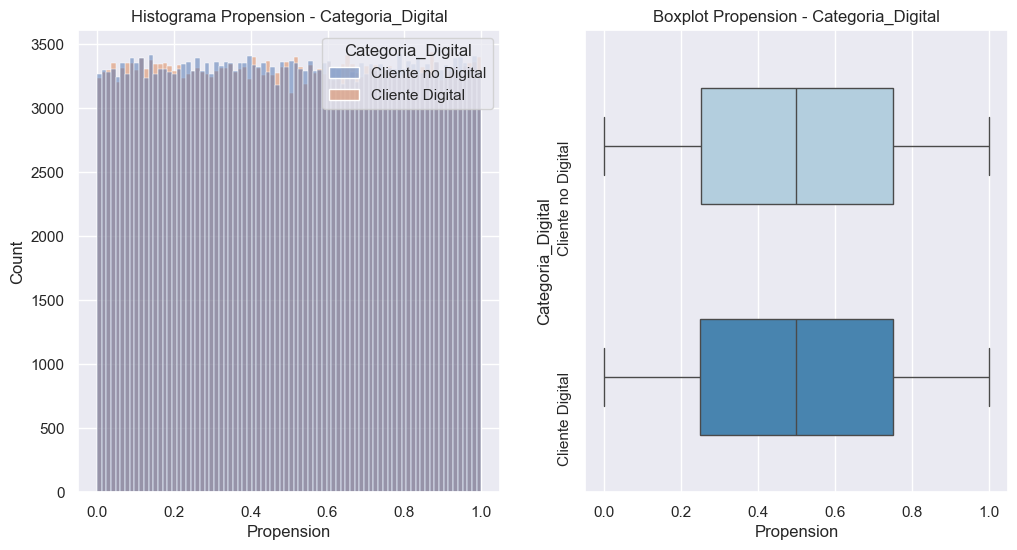

#--------------------------------#
Propension - Elasticidad_Precios
#--------------------------------#


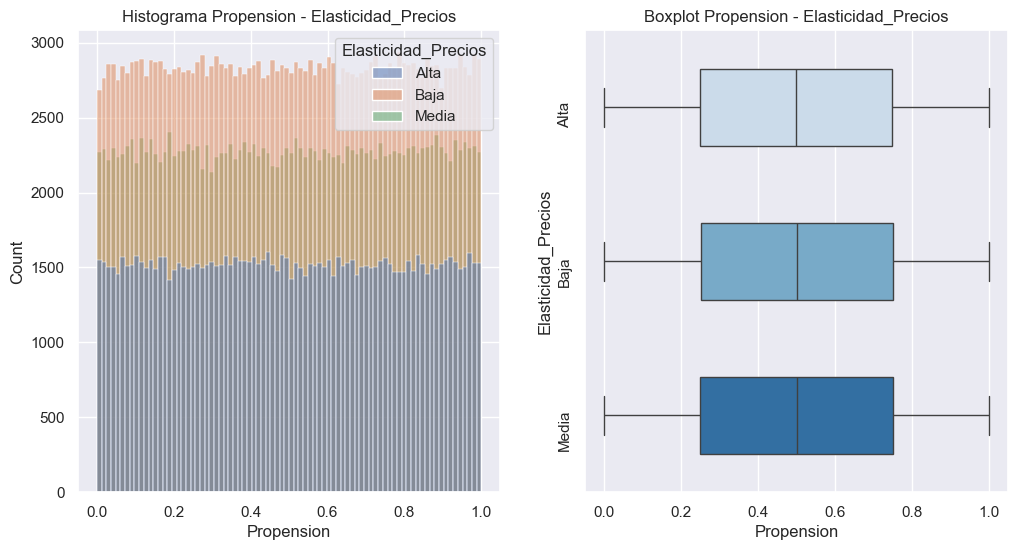

#--------------------------------#
Propension - Nacionalidad
#--------------------------------#


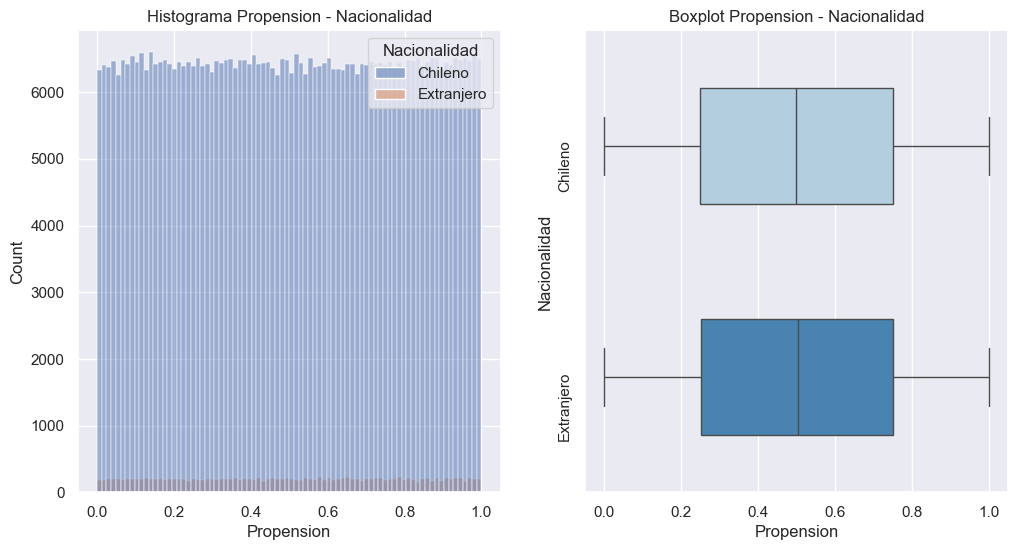

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#
#--------------------------------#
Probabilidad_No_Pago - Genero
#--------------------------------#


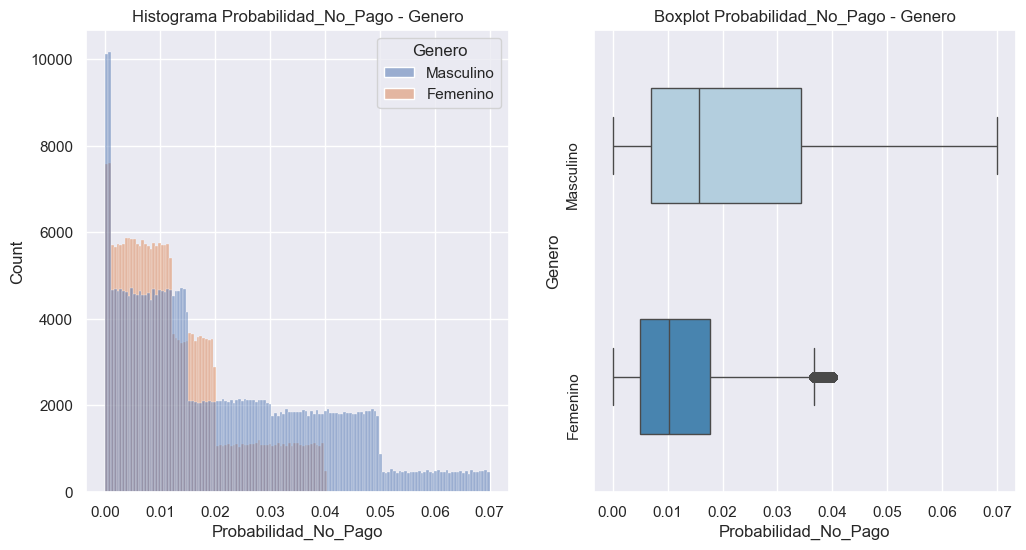

#--------------------------------#
Probabilidad_No_Pago - Categoria_Digital
#--------------------------------#


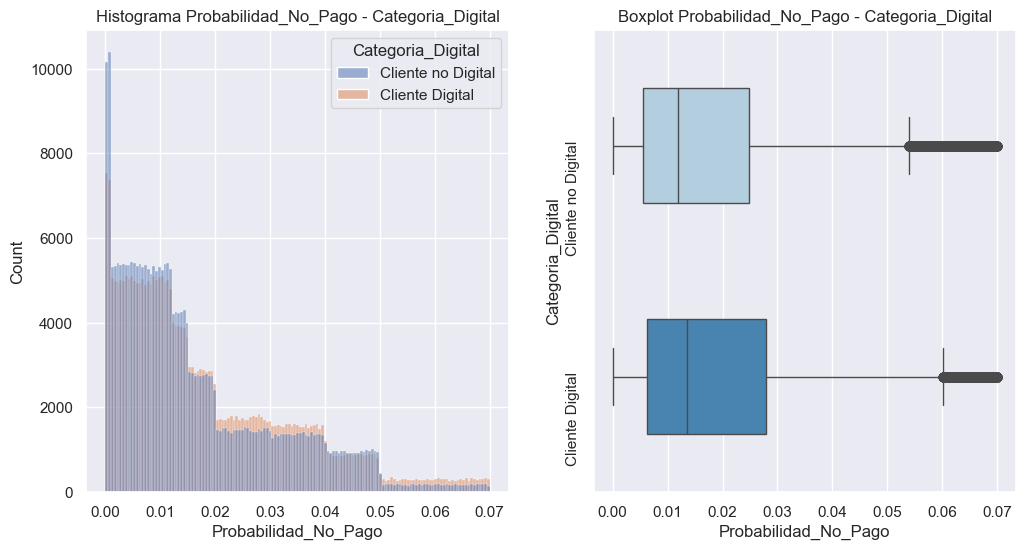

#--------------------------------#
Probabilidad_No_Pago - Elasticidad_Precios
#--------------------------------#


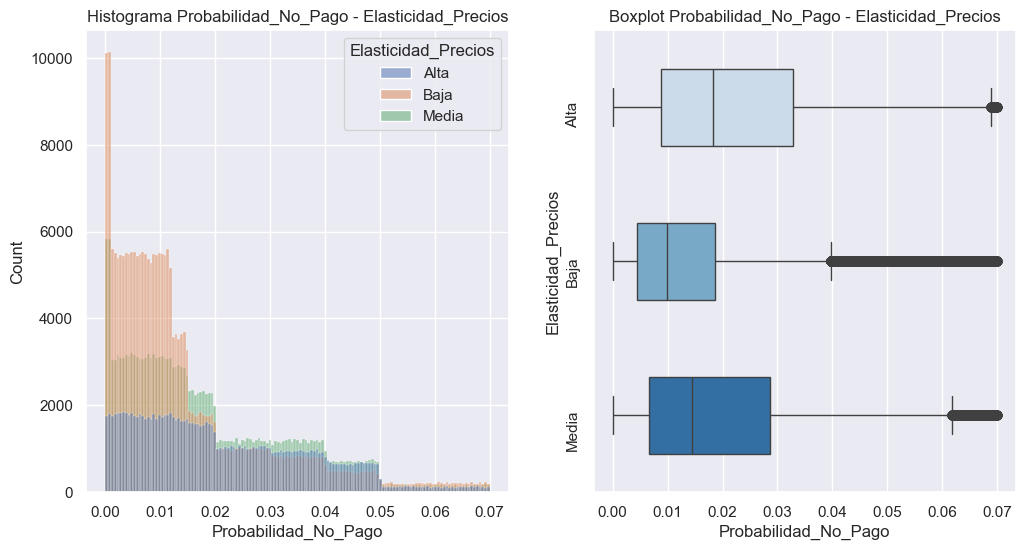

#--------------------------------#
Probabilidad_No_Pago - Nacionalidad
#--------------------------------#


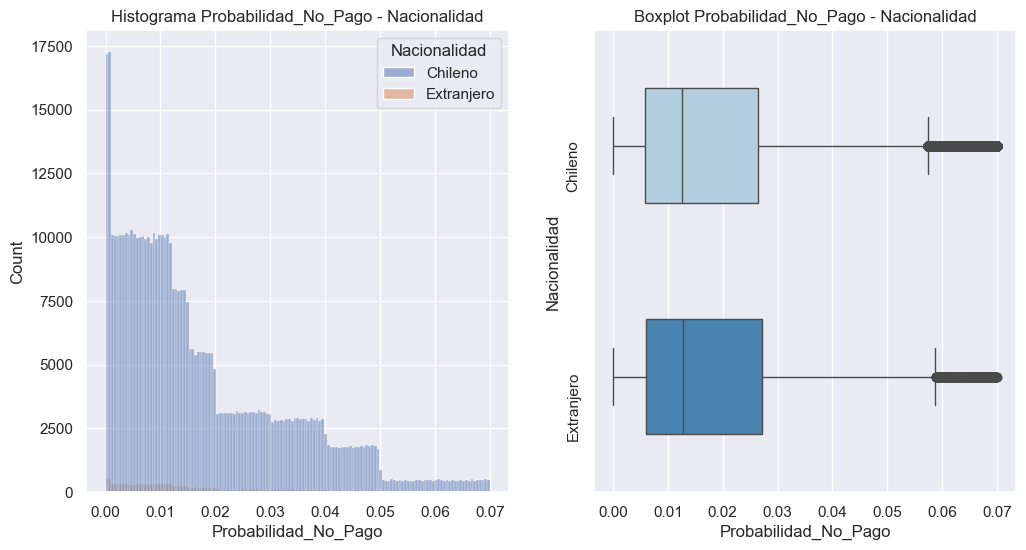

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#
#--------------------------------#
Edad - Genero
#--------------------------------#


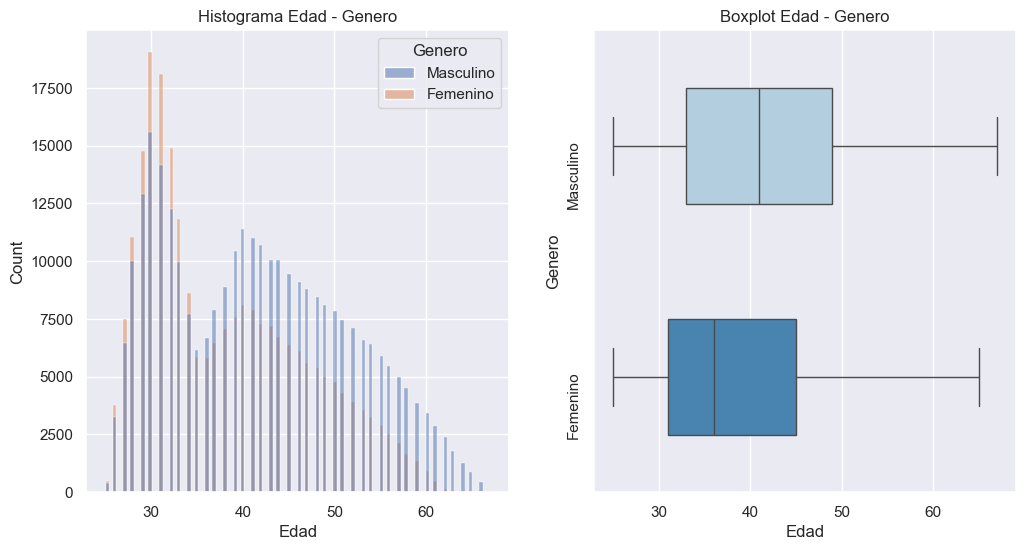

#--------------------------------#
Edad - Categoria_Digital
#--------------------------------#


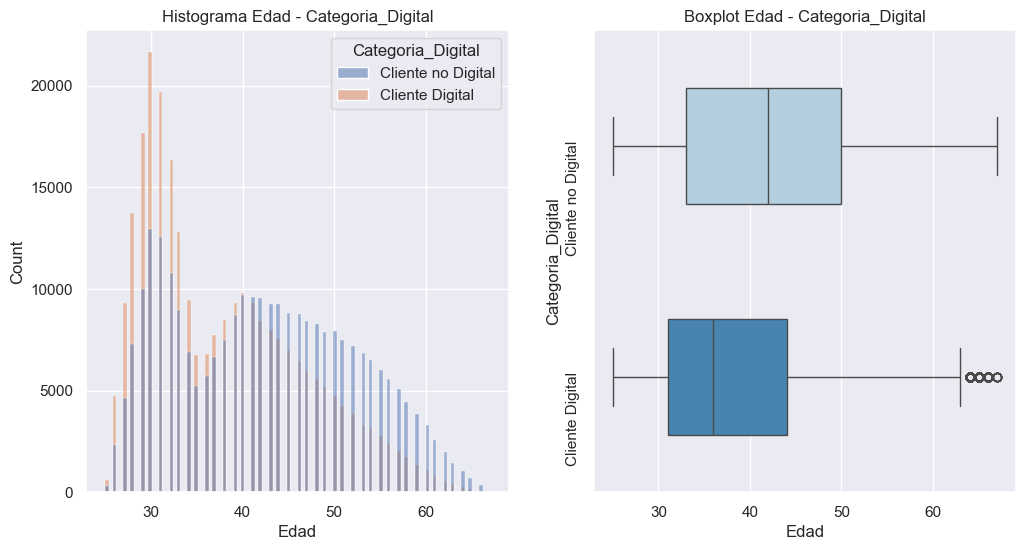

#--------------------------------#
Edad - Elasticidad_Precios
#--------------------------------#


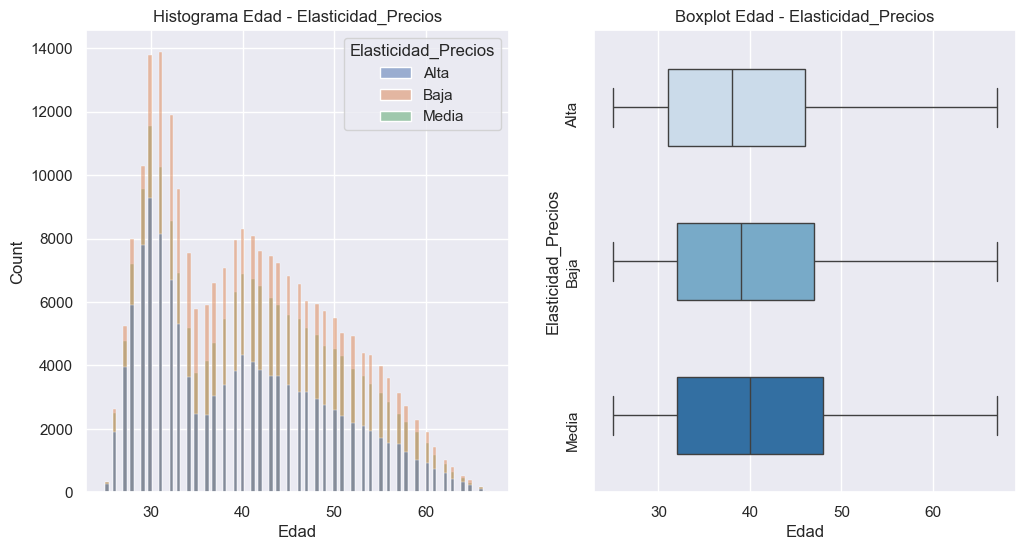

#--------------------------------#
Edad - Nacionalidad
#--------------------------------#


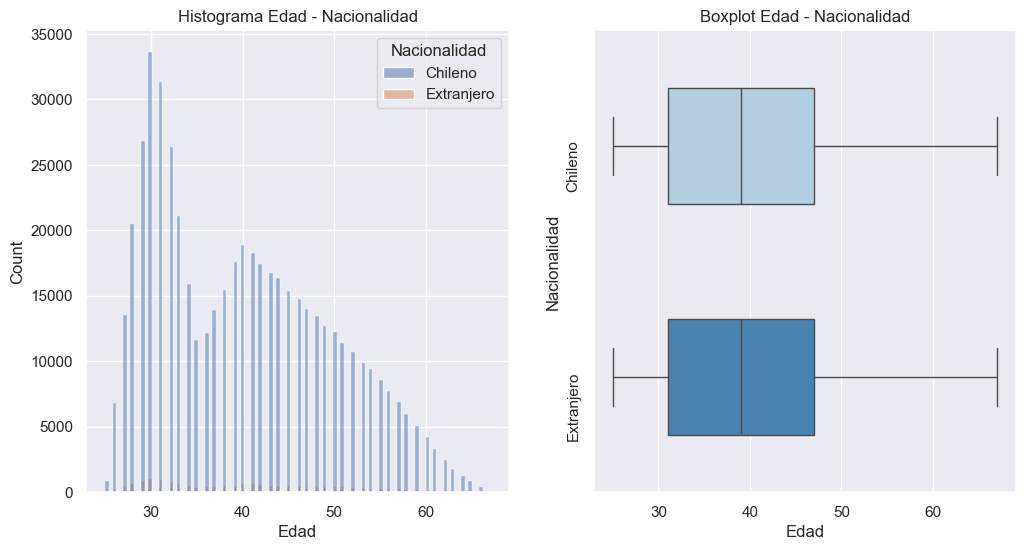

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#
#--------------------------------#
Renta - Genero
#--------------------------------#


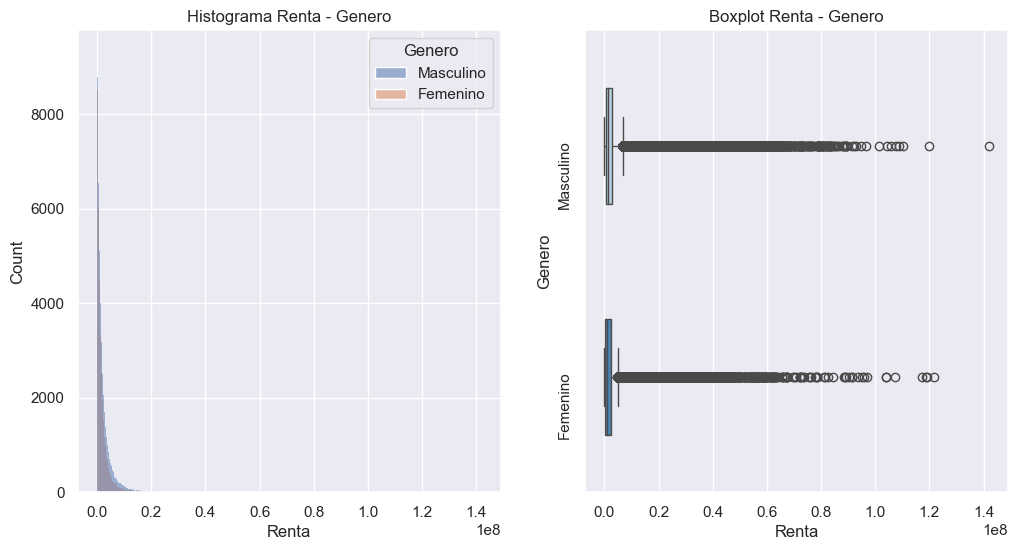

#--------------------------------#
Renta - Categoria_Digital
#--------------------------------#


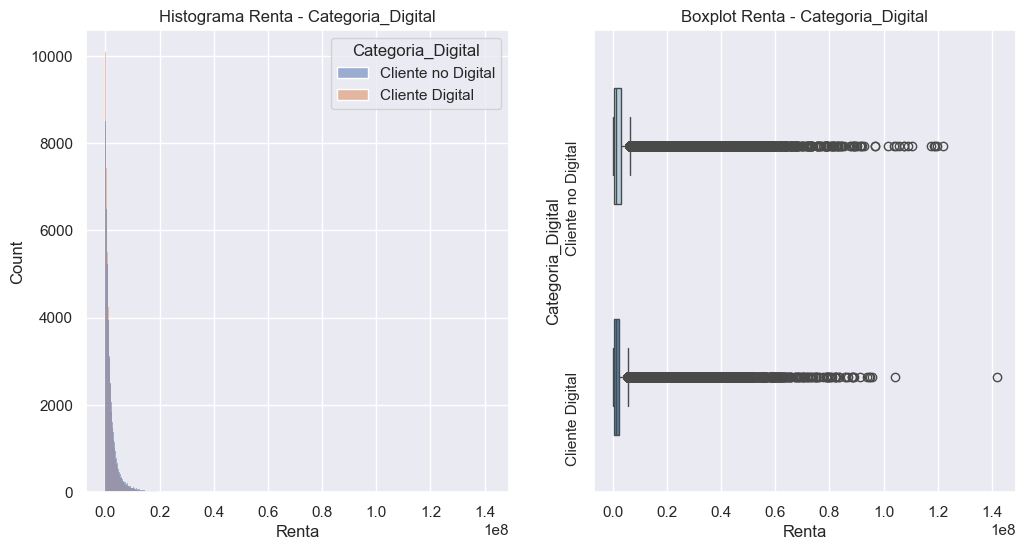

#--------------------------------#
Renta - Elasticidad_Precios
#--------------------------------#


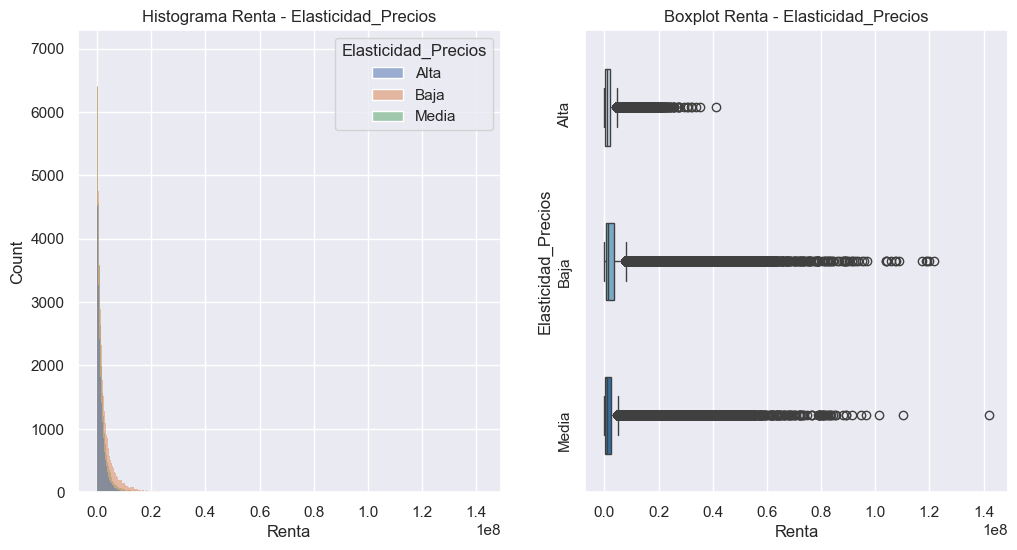

#--------------------------------#
Renta - Nacionalidad
#--------------------------------#


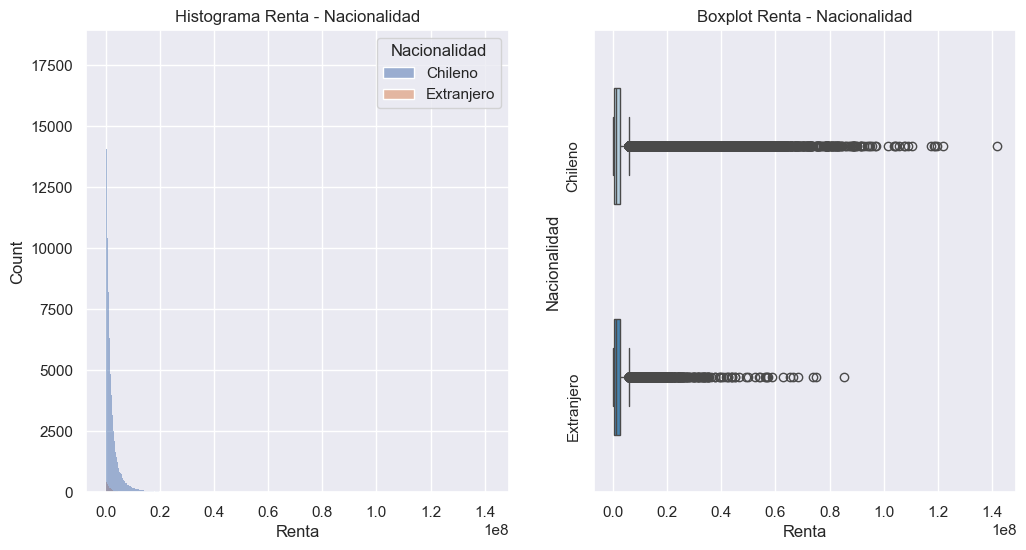

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#
#--------------------------------#
Oferta_Consumo - Genero
#--------------------------------#


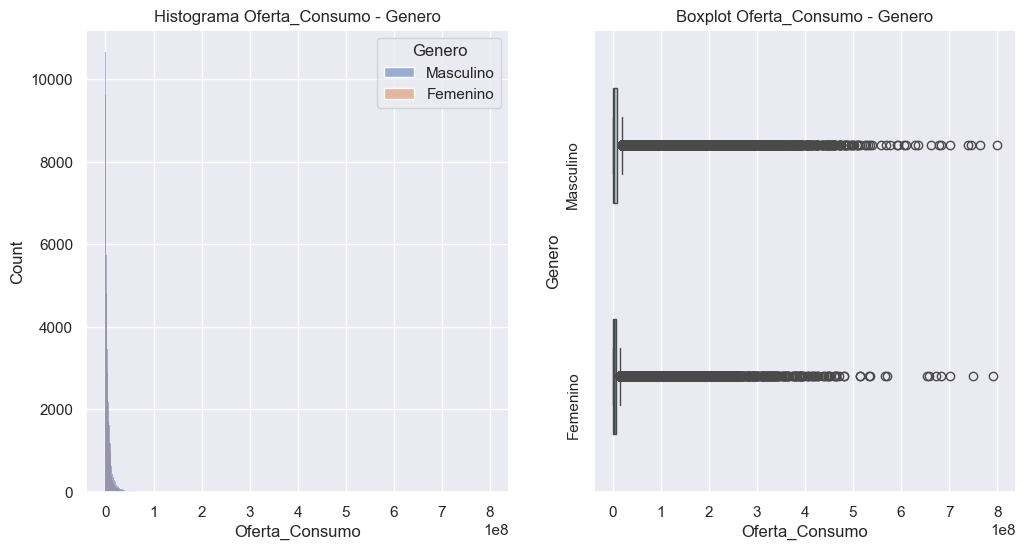

#--------------------------------#
Oferta_Consumo - Categoria_Digital
#--------------------------------#


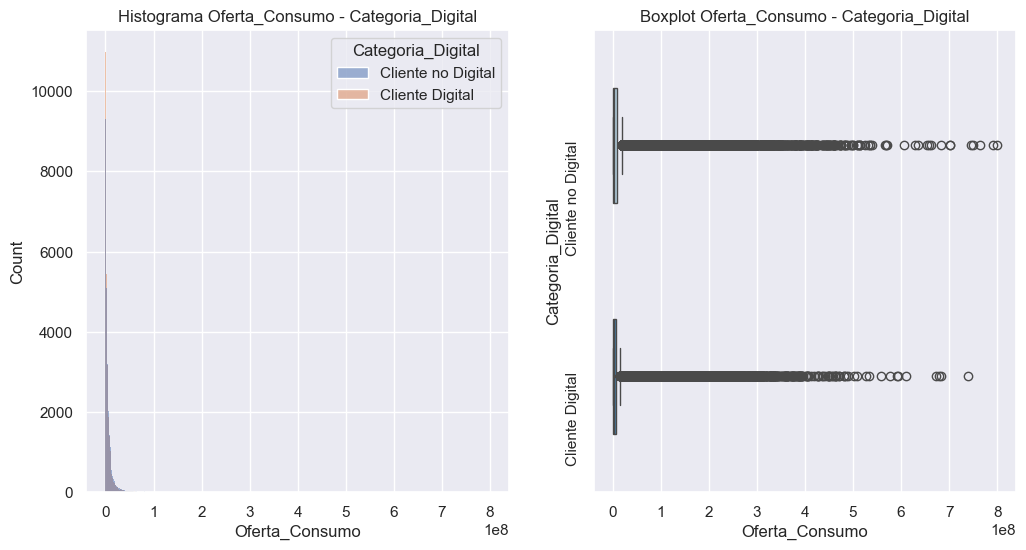

#--------------------------------#
Oferta_Consumo - Elasticidad_Precios
#--------------------------------#


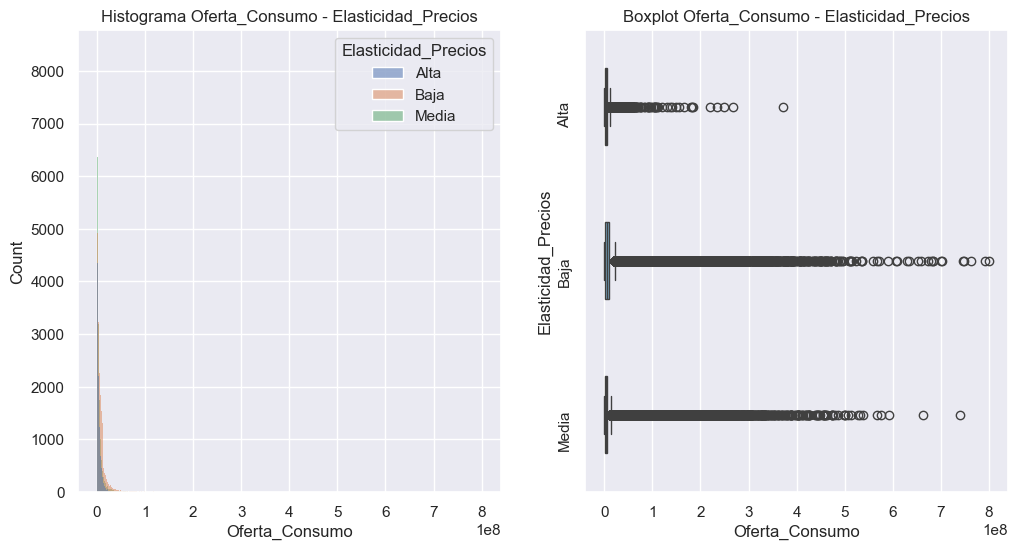

#--------------------------------#
Oferta_Consumo - Nacionalidad
#--------------------------------#


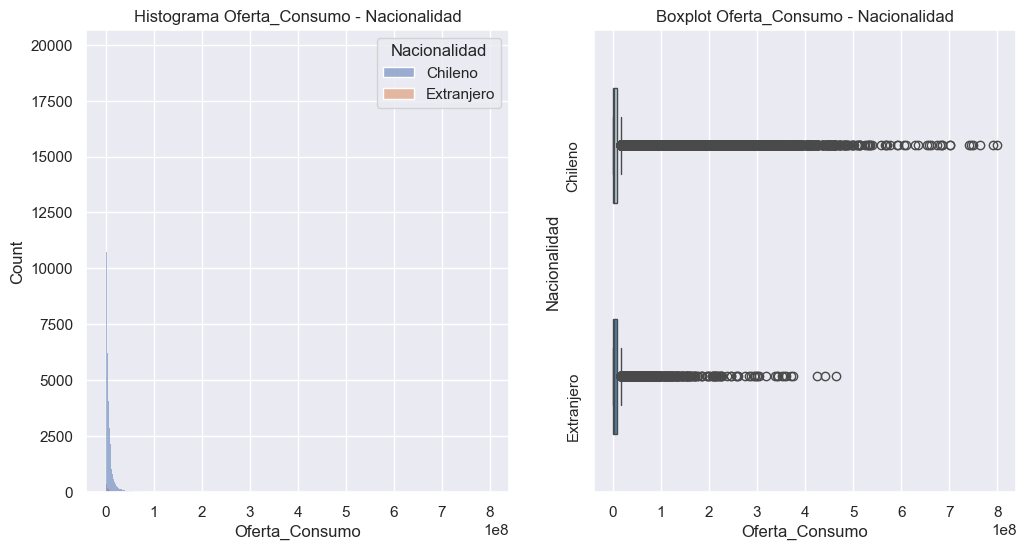

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#
#--------------------------------#
Deuda_CMF - Genero
#--------------------------------#


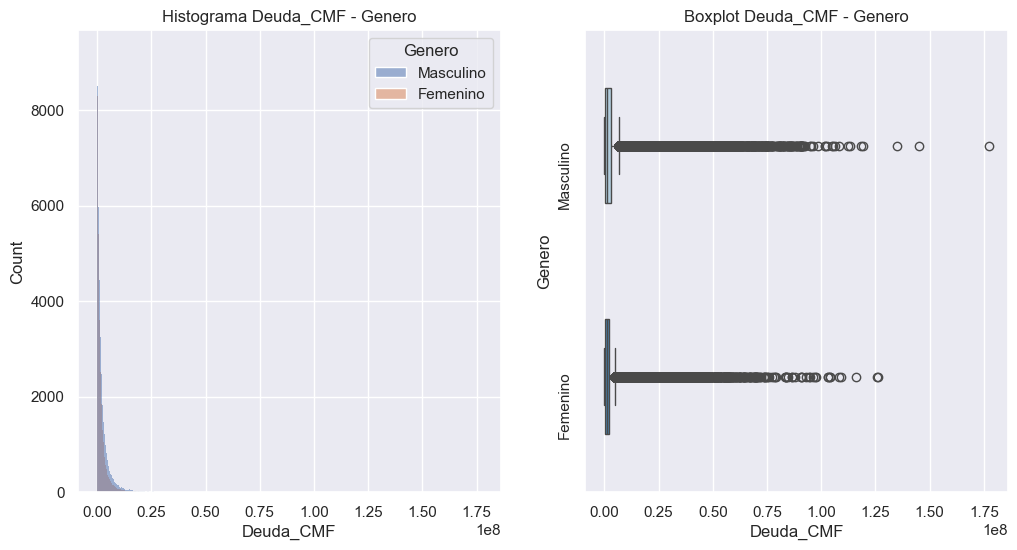

#--------------------------------#
Deuda_CMF - Categoria_Digital
#--------------------------------#


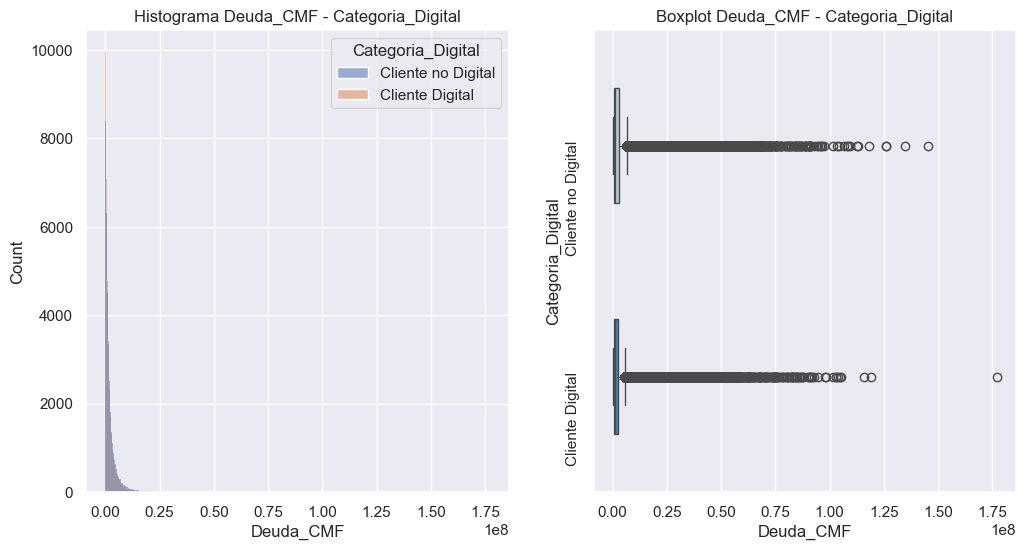

#--------------------------------#
Deuda_CMF - Elasticidad_Precios
#--------------------------------#


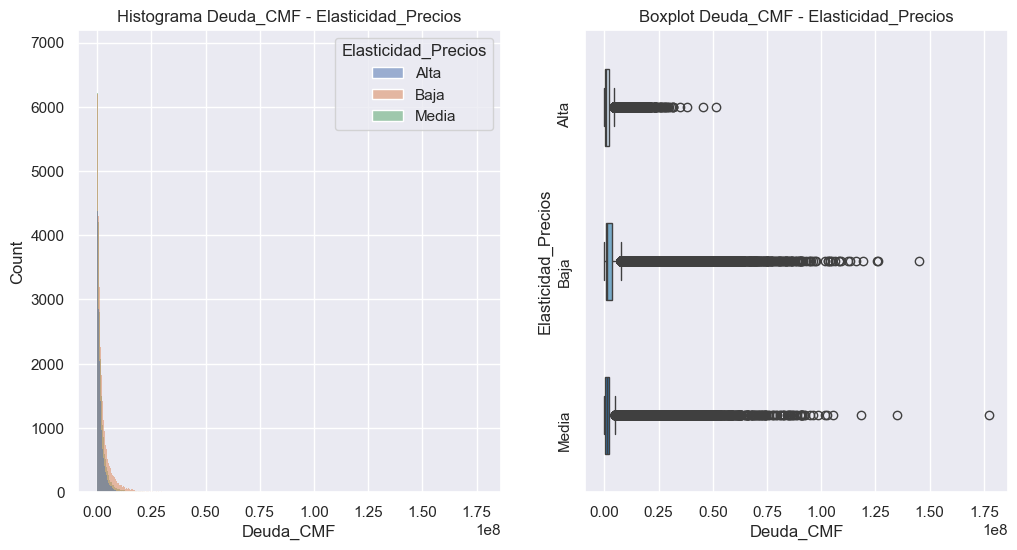

#--------------------------------#
Deuda_CMF - Nacionalidad
#--------------------------------#


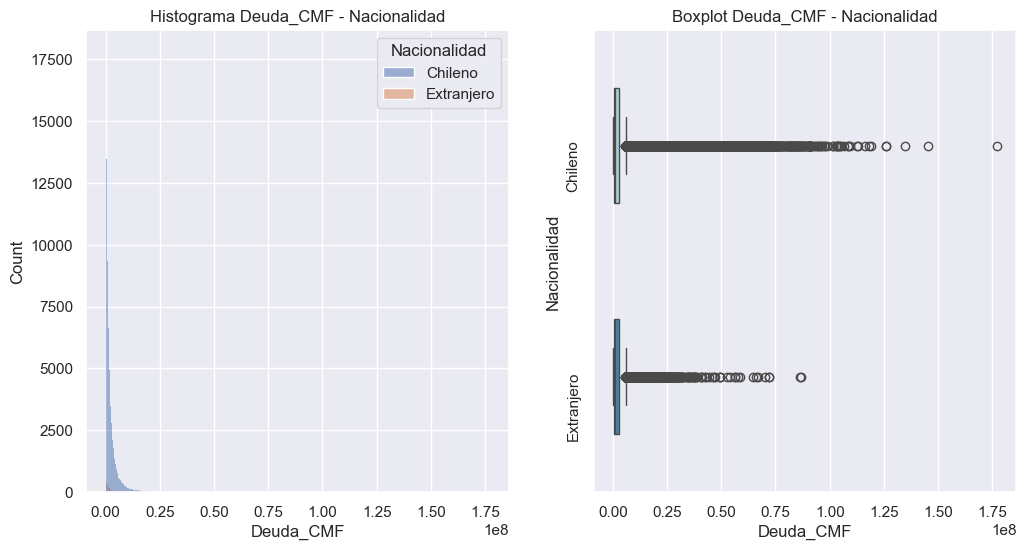

#--------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------#


In [66]:
for j in list(var_nun):
    for i in list(var_cat):
        print('#--------------------------------#')
        print(f'{j} - {i}')
        print('#--------------------------------#')

        plt.figure(figsize=(12, 6))

        # Crear el subplot para el histograma
        plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
        sns.histplot(data=df, x=j, hue=i)
        plt.title(f'Histograma {j} - {i}')

        # Crear el subplot para el boxplot
        plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
        sns.boxplot(data=df, x=j, y = i ,hue=i,palette='Blues',width=0.5)
        plt.title(f'Boxplot {j} - {i}')
        plt.yticks(rotation=90)
        plt.show()
        
    print('#--------------------------------------------------------------------------------------------------#')
    print('#--------------------------------------------------------------------------------------------------#')